Hi!

Here is my attempt to solve the eluvio movie scene segmentation challenge.

Given a list of 64 movies, the goal is to predict the scene transition boundary between every two shot of a movie

I approached the problem in 2 ways

1. I tried to replicate the codebase provided by the original authors by converting the gvien data into the same format.
However this led to a memory allocation error and I could not proceed with the method thereafter. 'https://anyirao.com/projects/SceneSeg.html'

2. With the given data, I tried to combine all the features such that I will be able to apply machine learning and deep learning models.


I will be going through both these methods in the notebook

I am using 37 movies for training and 27 movies for testing

Results are at the bottom

Let us look at the data first

In [ ]:
import json

In [7]:
with open('data/tt0052357.pkl', 'rb') as f:
        data = pickle.load(f)

This is what the given data looks like:

We have:
1. place feature, representing the features of images in the shot 
2. cast feature, data of people present in the shot with object detection models such as faster RCNN
3. action feature, representing the action going with temporal convolutional networks 
4. audio feature. the audio of the shot and scene
5. scene_transition_boundary_ground_truth, ground truth
6. shot_end_frame, representing the boundary
7. scene_transition_boundary_prediction, given predictions
8. imdb_id, movie id

In [8]:
data

{'place': tensor([[6.1556e-02, 1.0177e-01, 5.2085e-02,  ..., 6.7148e-02, 1.5965e-03,
          9.5967e-03],
         [5.2110e-02, 1.3152e-01, 4.7641e-02,  ..., 7.6565e-02, 1.4197e-03,
          1.1087e-02],
         [8.7748e-02, 2.4885e+00, 5.4332e-02,  ..., 7.1745e-01, 8.1299e-01,
          3.3096e-01],
         ...,
         [1.2349e-01, 4.4957e-01, 2.4556e-01,  ..., 1.0015e-02, 1.1907e-01,
          5.1556e-03],
         [1.9621e-02, 7.2868e-01, 2.4324e-01,  ..., 7.4836e-03, 3.7045e-02,
          7.4661e-02],
         [1.2028e-01, 2.9355e-01, 7.4574e-02,  ..., 4.0226e-02, 7.1149e-02,
          1.5697e-01]]),
 'cast': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ..., -0.0073,  0.1230, -0.0396],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ..., -0.0309,  0.1172, -0.0647],
         [ 0.0000,  0.0000,  0.0000,  ..., -0.0290,  0.0804,  0.0003],
    

# Here we represent the baseline provided to us

In [30]:
for i in os.listdir('data2'):
    with open('data2/'+str(i), 'rb') as f:
        data = pickle.load(f)
        fav = {'scene_transition_boundary_ground_truth': data['scene_transition_boundary_ground_truth'], 'scene_transition_boundary_prediction': data['scene_transition_boundary_prediction'],
                        'shot_end_frame': data['shot_end_frame'], 'imdb_id': data['imdb_id']}
        pickle.dump(fav, open('data_dir2/'+str(data['imdb_id'])+'.pkl', "wb"))

In [31]:
!python evaluate_sceneseg.py data_dir2/

# of IMDB IDs: 27
Scores: {
    "AP": 0.4615802116187682,
    "mAP": 0.48199051394228226,
    "Miou": 0.46508357436009745,
    "Precision": 0.2929881877369351,
    "Recall": 0.7506495769377108,
    "F1": 0.4117560720605304
}


# The first approach where I convert the data into the format of the authors

Getting a list of all the movies from the json file available at' https://drive.google.com/drive/folders/1F-uqCKnhtSdQKcDUiL3dRcLOrAxHargz' 
I did this so that I could retrieve the json in the exact format need for the model.

In [ ]:
import json
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import os
import torch

In [26]:
#Reading the json file and storing all the keys present. These keys are the imdb_ids
with open('/home/arjun/eluvio/SceneSeg/data/scene318/meta/scene_movie318.json') as f:
    rem = json.load(f)


In [49]:
json_new={}

In [42]:
#Collecting the imdb id that we have in our data
arr_names=[]
for i in os.listdir('/home/arjun/Downloads/data'):
    arr_names.append(i[:-4])

In [57]:
data['cast']

torch.Size([1101, 512])

In [55]:
arr_names #The list we were provided

['tt0107290',
 'tt0110604',
 'tt0052357',
 'tt0114746',
 'tt0945513',
 'tt0178868',
 'tt0976051',
 'tt0117060',
 'tt1001508',
 'tt0379786',
 'tt2488496',
 'tt0822832',
 'tt0092099',
 'tt0440963',
 'tt1099212',
 'tt0086190',
 'tt0163025',
 'tt2024544',
 'tt0217505',
 'tt0123755',
 'tt0172495',
 'tt0113277',
 'tt0088247',
 'tt0115759',
 'tt1119646',
 'tt0137523',
 'tt0479884',
 'tt0361748',
 'tt0118715',
 'tt0253474',
 'tt1375666',
 'tt1205489',
 'tt0124315',
 'tt0063442',
 'tt0088944',
 'tt0096320',
 'tt0119488',
 'tt0108399',
 'tt0078788',
 'tt1707386',
 'tt0103855',
 'tt0100405',
 'tt0082089',
 'tt0120689',
 'tt0319061',
 'tt0068646',
 'tt0073195',
 'tt0103776',
 'tt0099423',
 'tt0443272',
 'tt1038919',
 'tt0409459',
 'tt0116922',
 'tt2582846',
 'tt0112573',
 'tt0190332',
 'tt0075314',
 'tt0120890',
 'tt0281358',
 'tt1412386',
 'tt0399201',
 'tt0120382',
 'tt0116282',
 'tt0780571']

In [54]:
import os
os.listdir('/home/arjun/Downloads/data')[0][:-4]

'tt0107290'

In [32]:
#Taking only those keys in our data and saving in a json file. This is the shots per scene and start frame and end frame of the scene

In [50]:
for i in rem.keys():
    if i in arr_names:
        json_new[i] = rem[i]
    

In [52]:
import json
with open('json_new.json', 'w') as f:
    json.dump(json_new, f)

To use the codebase provided by 'https://anyirao.com/projects/SceneSeg.html'
I first convert the data provided in the challenge to match the format needed by the model

For action features:
    We require a pickle file where each shot is a key and the value is a array representing the action in the shot
We have 64 pickle files each representing shots in the movie



In [34]:
#It will look something like this

#{  '0000': []   ,  '0001':[]   }

In [111]:
for i in os.listdir('/home/arjun/Downloads/data'):
    with open('/home/arjun/Downloads/data/'+i, 'rb') as f:
        data = pickle.load(f)
    

    x = data['action'].detach().cpu().numpy()
    dict_store = {}
    count=0
    for j in x:
        dict_store[str(count).zfill(4)] = j
        count+=1
    output = open('/home/arjun/eluvio/SceneSeg/data/scene318/act_feat/'+str(i[:-4])+'.pkl', 'wb')
    pickle.dump(dict_store, output)
    output.close()

For label features: I pciked up the labels from 'https://drive.google.com/open?id=1F-uqCKnhtSdQKcDUiL3dRcLOrAxHargz' which is a part of the codebase.
I picked up those files which are present in the training data given to us.
We have 64 labels, 1 for each movie

In [96]:
import shutil, os
for i in os.listdir('/home/arjun/Downloads/data'):
    if i[:-4] in arr_names:
        shutil.copy('/home/arjun/eluvio/SceneSeg/data/scene318/shot_movie318/'+str(i[:-4])+'.txt', '/home/arjun/eluvio/SceneSeg/data/scene318/shot_movie318_2/')
    

I repeated the same for the shot_id. We now have the shot for each movie

In [94]:
import shutil, os
for i in os.listdir('/home/arjun/Downloads/data'):
    if i[:-4] in arr_names:
        shutil.copy('/home/arjun/eluvio/SceneSeg/data/scene318/label318/'+str(i[:-4])+'.txt', '/home/arjun/eluvio/SceneSeg/data/scene318/labels/')
    

For the cast features:
    We require the cast of each movie to be stored in pickle files
       Hence 64 pickle files

In [128]:
for i in os.listdir('/home/arjun/Downloads/data'):
    with open('/home/arjun/Downloads/data/'+i, 'rb') as f:
        data = pickle.load(f)
    

    x = data['cast'].detach().cpu().numpy()
    dict_store = {}
    for j in x:
        dict_store[str(count).zfill(4)] = j
        count+=1
    output = open('/home/arjun/eluvio/SceneSeg/data/scene318/cast_feat/'+str(i[:-4])+'.pkl', 'wb')
    pickle.dump(dict_store, output)
    output.close()

Places and audio have the same format 
We have a folder for each movie and we save a numpy file for each shot of the movie

In [74]:
for i in os.listdir('/home/arjun/Downloads/data'):
    count=0
    with open('/home/arjun/Downloads/data/'+i, 'rb') as f:
        data = pickle.load(f)
    for j in data['place']:
        x = (j.detach().cpu().numpy())
        try:
            os.mkdir('/home/arjun/eluvio/SceneSeg/data/scene318/place_feat_att/'+str(i[:-4]))
            
            with open('/home/arjun/eluvio/SceneSeg/data/scene318/place_feat_att/'+str(i[:-4])+ '/shot_'+str(count).zfill(4)+'.npy', 'wb') as g:
                np.save(g,x)
            count+=1
        except:
            with open('/home/arjun/eluvio/SceneSeg/data/scene318/place_feat_att/'+str(i[:-4])+ '/shot_'+str(count).zfill(4)+'.npy', 'wb') as g:
                np.save(g,x)
            count+=1


In [ ]:
for i in os.listdir('/home/arjun/Downloads/data'):
    count=0
    with open('/home/arjun/Downloads/data/'+i, 'rb') as f:
        data = pickle.load(f)
    for j in data['audio']:
        x = j.detach().cpu().numpy()
        try:
            os.mkdir('/home/arjun/eluvio/SceneSeg/data/scene318/aud_feat_att/'+str(i[:-4]))
            
            with open('/home/arjun/eluvio/SceneSeg/data/scene318/aud_feat_att/'+str(i[:-4])+ '/shot_'+str(count).zfill(4)+'.npy', 'wb') as g:
                np.save(g,x)
            count+=1
        except:
            with open('/home/arjun/eluvio/SceneSeg/data/scene318/aud_feat_att/'+str(i[:-4])+ '/shot_'+str(count).zfill(4)+'.npy', 'wb') as g:
                np.save(g,x)
            count+=1


# Once we do this and run the codebase with the command  'python run.py config/all.py'. Unfortunately, I encountered a CUDA memeory error. 
# I tried to sample for 2 movies instead of 64 and I received the same error.



# I then decided that recreating with limited resources is not a viable solution and I had to try simpler models first

# Now for the second step where I use the data in a more efficient manner

In [1]:
import pickle
import torch
import numpy as np
import sklearn
import os
from sklearn import preprocessing

import tensorflow as tf
import matplotlib.pyplot as plt
from focal_loss import BinaryFocalLoss

# get all files in the folder
def feature(directory,test=False,clf=None):
    '''
    In this function we first extract all the features: places,audio, action, cast.
    The next step is to stack these features in a horizontal manner
    Once that is done we stack every 2 features since we need to predict the transition 
    This leads to same size for ground truth and the labels
    
    Inputs:
    Directory: location of the pkl files
    test: Indicates if the method is train or test 
    clf: it is the model after training
    '''
    files = os.listdir(directory)
    total_files = len(files)  # Calculate total number of files

    j = 0
    for i in range(total_files):
        filename = directory + '/' + files[i]
        with open(filename, 'rb') as f:
            data = pickle.load(f)
        
        feat1 = data['place']
        feat1 = feat1.data.numpy()  # convert tensors into numpy arrays for sklearn
        feat1_size = feat1.shape[1]

        feat2 = data['cast']
        feat2 = feat2.data.numpy()
        feat2_size = feat2.shape[1]

        feat3 = data['action']
        feat3 = feat3.data.numpy()
        feat3_size = feat3.shape[1]

        feat4 = data['audio']
        feat4 = feat4.data.numpy()
        feat4_size = feat4.shape[1]

        x = np.hstack((feat1, feat2, feat3, feat4))
        y = data['scene_transition_boundary_ground_truth']

        scaler = preprocessing.StandardScaler().fit(x)
        x_scaled = scaler.transform(x)

        # Fold the data set to obtain features from adjoining shots
        #The shape is 512*3 + 2048 = 3584. 
        N = x.shape[0]  
        x_fold = np.zeros((N - 1, 2 * x.shape[1]))  # increasing by 2*x since we need to hstack again
        #Upon folding shape is 3584* = 7168. This is for the 2nd dimension. Shape of 1st dimension depends on number of movies
        for l in range(N - 1):
            x_fold[l, :] = np.hstack((x_scaled[l, :], x_scaled[l + 1, :]))  # combining every 2 shots
        if test is True:
                predicted = model(torch.tensor(x_fold, dtype=torch.float32))
                print(x_fold.shape, 'Test')
                fav = {'scene_transition_boundary_ground_truth': y, 'scene_transition_boundary_prediction': predicted.detach().numpy(),
                        'shot_end_frame': data['shot_end_frame'], 'imdb_id': data['imdb_id']}
                pickle.dump(fav, open('data_dir/'+str(data['imdb_id'])+'.pkl', "wb"))
                
        else:
            if (j == 0):
                X = x_fold
                Y = y
            else:
                X = np.concatenate((X, x_fold), axis=0)
                Y = np.concatenate((Y, y),axis=0)

            j = j + 1
    if test is False:
        return X,Y

directory = 'data'
X,Y = feature(directory)



# Start with a simple neural network

In [233]:
from torch.utils.data import Dataset, DataLoader
class dataset(Dataset):
    ''

    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        self.length = self.x.shape[0]


    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

    def __len__(self):
        return self.length

trainset = dataset(X, Y)  # DataLoader



In [244]:

trainloader = DataLoader(trainset, batch_size=64, shuffle=False)
import torch.nn as nn

from torch import nn
from torch.nn import functional as F

class Net(nn.Module):
    '''
    A simple linear network
    '''
    def __init__(self,input_shape):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_shape,64)
        self.b1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64,32)
        self.b2 = nn.BatchNorm1d(32)
        self.fc3 = nn.Linear(32,1)
    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = self.b1(x)
        x = torch.relu(self.fc2(x))
        x = self.b2(x)
        x = torch.sigmoid(self.fc3(x))
        return x

#hyper parameters
learning_rate = 0.01
epochs = 50
# Model , Optimizer, Loss
model = Net(input_shape=X.shape[1])
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()

losses = []
accur = []


In [245]:
for i in range(epochs):
    for j, (x_train, y_train) in enumerate(trainloader):
        # calculate output
        output = model(x_train)

        # calculate loss
        loss = loss_fn(output, y_train.reshape(-1, 1))


        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if i % 2 == 0:
        losses.append(loss)
        print("epoch {}\tloss : {}".format(i, loss))


epoch 0	loss : 0.20708124339580536
epoch 2	loss : 0.1191529706120491
epoch 4	loss : 0.05605647340416908
epoch 6	loss : 0.02156488411128521
epoch 8	loss : 0.01382701937109232
epoch 10	loss : 0.007840287871658802
epoch 12	loss : 0.004932770039886236
epoch 14	loss : 0.0026233962271362543
epoch 16	loss : 0.0019705926533788443
epoch 18	loss : 0.0014836674090474844
epoch 20	loss : 0.0010893383296206594
epoch 22	loss : 0.0009672963060438633
epoch 24	loss : 0.0008987343171611428
epoch 26	loss : 0.0007681747083552182
epoch 28	loss : 0.0007364962948486209
epoch 30	loss : 0.0006202621734701097
epoch 32	loss : 0.0006228536949492991
epoch 34	loss : 0.0005413030739873648
epoch 36	loss : 0.0004977845237590373
epoch 38	loss : 0.00045849519665353
epoch 40	loss : 0.00045264113578014076
epoch 42	loss : 0.0004228444304317236
epoch 44	loss : 0.0003862351586576551
epoch 46	loss : 0.0004019600455649197
epoch 48	loss : 0.00036098083364777267


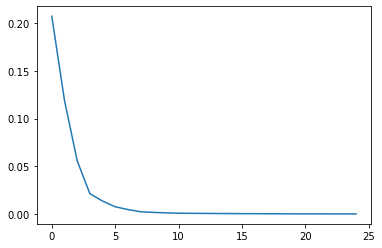

In [248]:
import numpy as np
import matplotlib.pyplot as plt


plt.plot(losses) # plotting by columns
plt.show()

In [246]:
feature('data2/',True,model)

(1645, 7168) Test
(1804, 7168) Test
(1211, 7168) Test
(1188, 7168) Test
(1837, 7168) Test
(1447, 7168) Test
(2134, 7168) Test
(2710, 7168) Test
(2765, 7168) Test
(2760, 7168) Test
(918, 7168) Test
(1827, 7168) Test
(1364, 7168) Test
(1549, 7168) Test
(1442, 7168) Test
(1287, 7168) Test
(1194, 7168) Test
(2012, 7168) Test
(1763, 7168) Test
(1805, 7168) Test
(1380, 7168) Test
(2609, 7168) Test
(1487, 7168) Test
(2548, 7168) Test
(727, 7168) Test
(2395, 7168) Test
(1873, 7168) Test


Upon running the model with 

# Results

In [247]:
# for standard scaler 
!python evaluate_sceneseg.py data_dir/

# of IMDB IDs: 27
Scores: {
    "AP": 0.21574664494479046,
    "mAP": 0.2331933218420753,
    "Miou": 0.3836303020554841,
    "Precision": 142.22222222222223,
    "Recall": 78.51851851851852,
    "F1": 99.19740677212857
}


In [87]:
# for standard scaler 
!python evaluate_sceneseg.py data_dir/

# of IMDB IDs: 27
Scores: {
    "AP": 0.2452689693226328,
    "mAP": 0.26102519658286005,
    "Miou": 0.38804374907272776,
    "Precision": 142.22222222222223,
    "Recall": 73.0,
    "F1": 94.54120948486168
}


In [60]:
# for minmax scaler
!python evaluate_sceneseg.py data_dir/

# of IMDB IDs: 27
Scores: {
    "AP": 0.277382974194029,
    "mAP": 0.2955761839920259,
    "Miou": 0.346955531988229,
    "Precision": 142.22222222222223,
    "Recall": 31.40740740740741,
    "F1": 48.64512523899404
}
